# Assignment 2 - Regression, Logical Regression, and ANNs

In [26]:
#Importing libraries
from sklearn import datasets, linear_model, model_selection, __version__
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 2.1 Linear Regression with Scikit-learn on Linnerud dataset

In [27]:
#Code for understanding the data
data = datasets.load_linnerud()
print(list(data.target_names))
print(list(data.feature_names))

['Weight', 'Waist', 'Pulse']
['Chins', 'Situps', 'Jumps']


In [28]:
X, y = datasets.load_linnerud(return_X_y=True)
X = X[:, np.newaxis,1]
y = y[:, np.newaxis,1]


In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

In [30]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# predictions on test data
y_pred = model.predict(X_test)
print(y_pred)

[[39.15710876]
 [35.78449148]
 [37.17321624]
 [33.60220971]
 [37.9270954 ]
 [37.56999475]
 [36.97482699]]


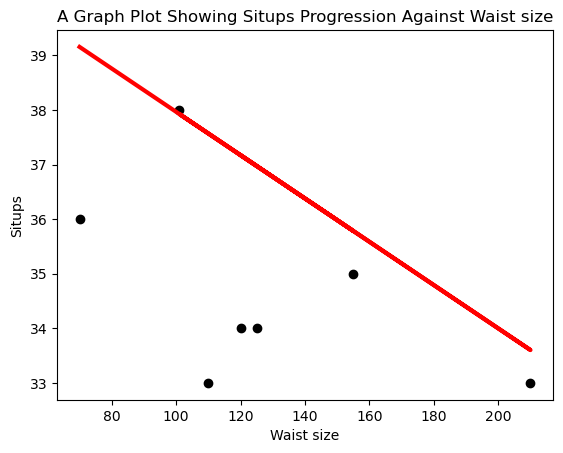

In [32]:
# plot the X_test and y_pred values
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Waist size')
plt.ylabel('Situps')
plt.title('A Graph Plot Showing Situps Progression Against Waist size')
plt.show()

In [33]:
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(mse)

Mean error: 2.69 (7.3%)


## 2.2 Logistic Regression 